In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from operator import itemgetter
from collections import OrderedDict

from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

# import torch
# from torch import optim,nn
# import torch.nn.functional as F
# from torchvision import transforms as T,models
# from torch.utils.data import Dataset, DataLoader, random_split
# from torchvision.utils import make_grid

# pd.options.plotting.backend = "plotly"
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Matplotlib is building the font cache; this may take a moment.


In [2]:
data=pd.read_csv(r"C:\Users\User\cip\sample\sample_labels.csv")
data.head(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


<AxesSubplot:>

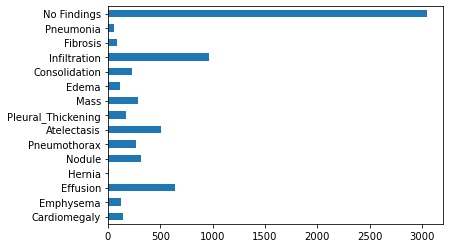

In [3]:
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']

for pathology in pathology_list :
    data[pathology] = data['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)
    
data['No Findings'] = data['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)
data = data.drop(list(data.iloc[:,1:11].columns.values),axis = 1)
data.iloc[:,1:].sum().plot.barh()

<AxesSubplot:>

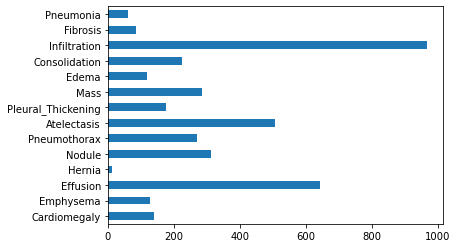

In [4]:
data = data.drop(['No Findings'],axis = 1)
data.iloc[:,1:].sum().plot.barh()

In [12]:
data

,Image Index,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
0,00000013_005.png,0,1,0,0,0,1,0,1,0,0,0,1,0,0
1,00000013_026.png,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,00000017_001.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00000030_001.png,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,00000032_001.png,1,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5601,00030712_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5602,00030786_005.png,1,1,1,0,0,0,0,0,0,0,0,0,0,0
5603,00030789_000.png,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5604,00030792_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
def compute_class_freqs(labels):

    labels = np.array(labels)
    N = labels.shape[0]

    positive_frequencies = np.sum(labels, axis = 0) / N
    negative_frequencies = 1 - positive_frequencies

    return positive_frequencies, negative_frequencies
freq_pos,freq_neg = compute_class_freqs(data.iloc[:,1:])

In [6]:
df = pd.DataFrame({"Class": pathology_list, "Label": "Positive", "Value": freq_pos})
df = df.append([{"Class": pathology_list[l], "Label": "Negative", "Value": v} for l,v in enumerate(freq_neg)], ignore_index=True)



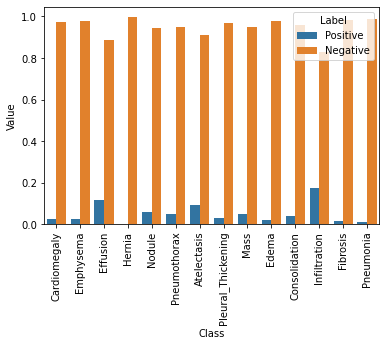

In [7]:
plt.xticks(rotation=90)
f = sns.barplot(x="Class", y="Value", hue="Label" ,data=df)

In [8]:
pos_weights=freq_neg
neg_weights=freq_pos
pos_contribution=freq_pos*pos_weights
neg_contribution=freq_neg*neg_weights

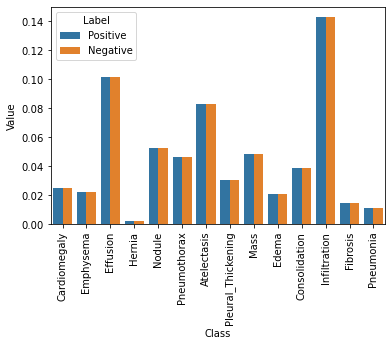

In [10]:
df = pd.DataFrame({"Class": pathology_list, "Label": "Positive", "Value": pos_contribution})
df = df.append([{"Class": pathology_list[l], "Label": "Negative", "Value": v} for l,v in enumerate(neg_contribution)], ignore_index=True)
plt.xticks(rotation=90)
f = sns.barplot(x="Class", y="Value", hue="Label" ,data=df)